# **Problem Statement**

### Perform clustering (Hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters.

### Draw the inferences from the clusters obtained.



*   Clustering analysis is an unsupervised learning method that separates the data points into several specific bunches or groups, such that the data points in the same groups have similar properties and data points in different groups have different properties in some sense.

* It comprises of many different methods based on different distance measures. E.g. K-Means (distance between points), Affinity propagation (graph distance), Mean-shift (distance between points), DBSCAN (distance between nearest points), Gaussian mixtures (Mahalanobis distance to centers), Spectral clustering (graph distance), etc.

* Centrally, all clustering methods use the same approach i.e. first we calculate similarities and then we use it to cluster the data points into groups or batches. Here we will focus on the Density-based spatial clustering of applications with noise (DBSCAN) clustering method.List item




In [228]:
#import libraries
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

In [229]:
# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [230]:
# Data display customization

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

## **1) Case Summary**

East-West Airlines is trying to learn more about its customers. Key issues are their flying patterns, earning and use of frequent flyer rewards, and use of the airline credit card. The task is to identify customer segments via clustering. The file EastWestAirlines.xls contains information on 4000 passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar charactersitics for the purpose of targeting different segments for different types of mileage offers.

In [231]:
# Importing dataset
from google.colab import files
uploded=files.upload()
data = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

# Column rename.
data.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace=True)

#Set ID as Index Column
data.set_index('ID',inplace=True)
data


Saving EastWestAirlines.xlsx to EastWestAirlines (3).xlsx


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


### **Data Description:**

The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:

cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:

cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

**Note:**



*   under 5,000 2 = 5,000 - 10,000 3 = 10,001 - 25,000 4 = 25,001 - 50,000 5 =

over 50,000

* Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

* Bonus_trans--Number of non-flight bonus transactions in the past 12 months

* Flight_miles_12mo--Number of flight miles in the past 12 months

* Flight_trans_12--Number of flight transactions in the past 12 months

* Days_since_enrolled--Number of days since enrolled in flier program

* Award--whether that person had award flight (free flight) or not

### **Data Exploration**

In [232]:
#Descreptive Statistics
data.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [233]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [234]:
# different cc_miles have different max values.
# so, we want to check what values these columns can take

print('unique_cc1',data.cc1_miles.unique())
print('unique_cc2',data.cc2_miles.unique())
print('unique_cc3',data.cc3_miles.unique())

unique_cc1 [1 4 3 2 5]
unique_cc2 [1 2 3]
unique_cc3 [1 3 2 4 5]


### **Missing Values**

In [235]:
# As a part of the Data cleansing we check the data for any missing/ na values
# null count for columns

null_count_col = data.isnull().sum().value_counts(ascending=False)

# null percentage for columns

null_percent_col = (data.isnull().sum() * 100 / len(data)).value_counts(ascending=False)

print("Null Count for Columns:\n\n", null_count_col, "\n")
print("Null Percentage for Columns:\n\n", null_percent_col)

Null Count for Columns:

 0    11
dtype: int64 

Null Percentage for Columns:

 0.0    11
dtype: int64


In [236]:
# null count for rows

null_count_row = data.isnull().sum(axis=1).value_counts(ascending=False)

# null percentage for rows

null_percent_row = (data.isnull().sum(axis=1) * 100 / len(data)).value_counts(ascending=False)

print("Null Count for Rows:\n\n", null_count_row, "\n")
print("Null Percentage for Rows:\n\n", null_percent_row)

Null Count for Rows:

 0    3999
dtype: int64 

Null Percentage for Rows:

 0.0    3999
dtype: int64


### **Duplicated Values**

In [237]:
#Duplicated rows
# Additionally we check the data for any duplicate values, now this can be an optional check depending on the data being used
data.duplicated().sum()

1

In [238]:
data[data.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
3899,1000,0,1,1,1,0,0,0,0,1597,0


In [239]:
data.drop_duplicates(keep=False,inplace=True)
data.shape

(3997, 11)

### **Exploratory Data Analysis**

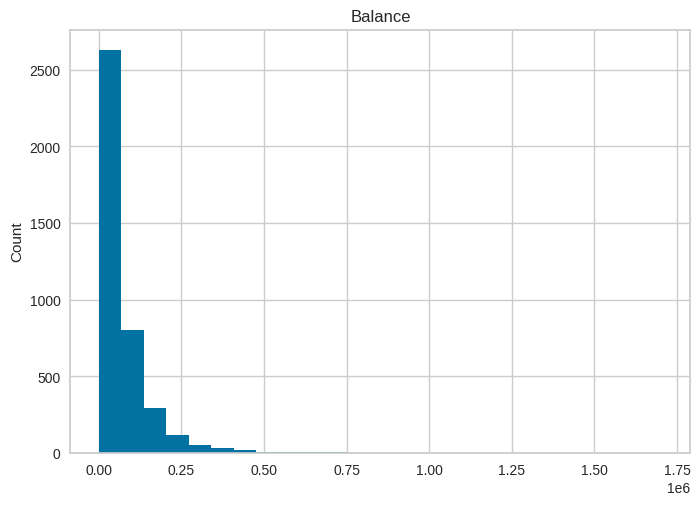

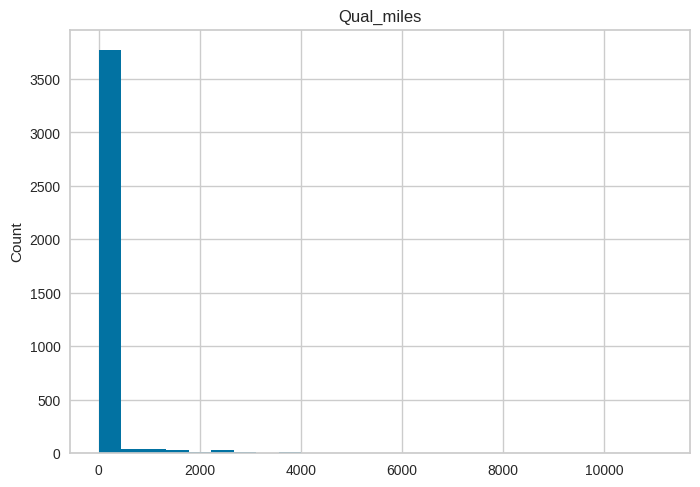

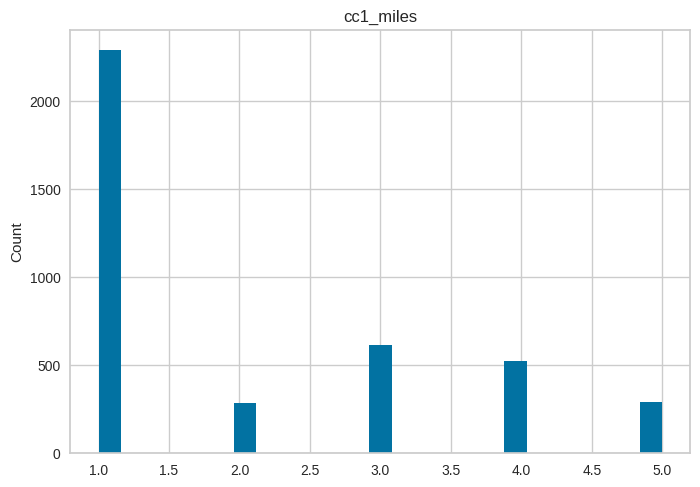

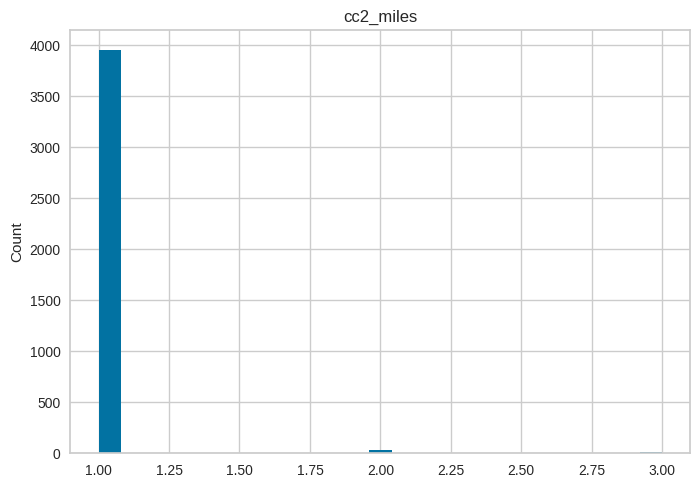

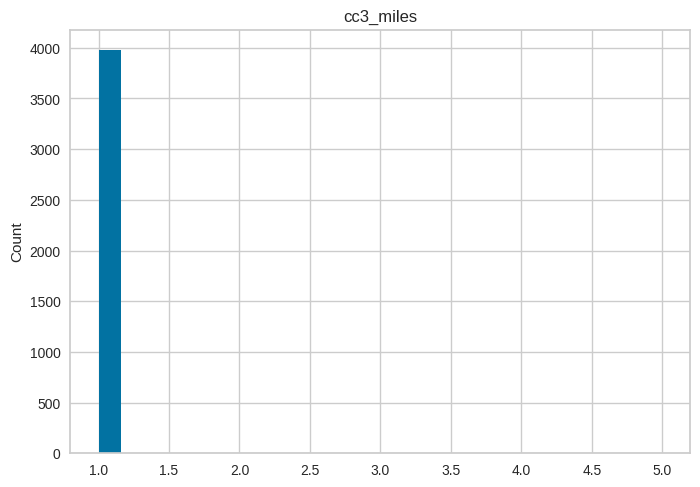

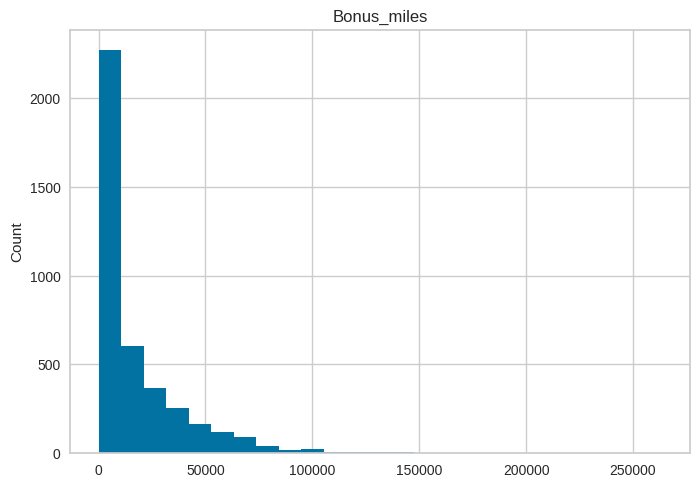

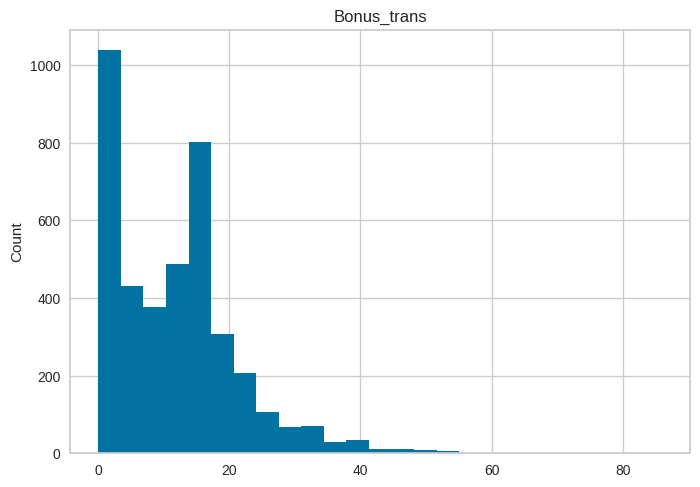

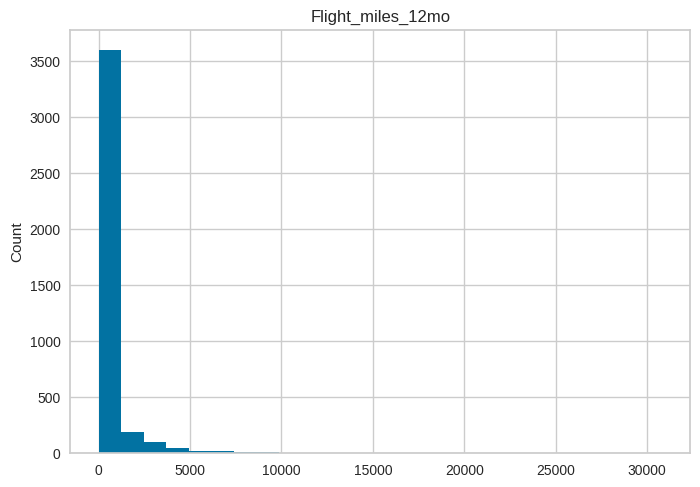

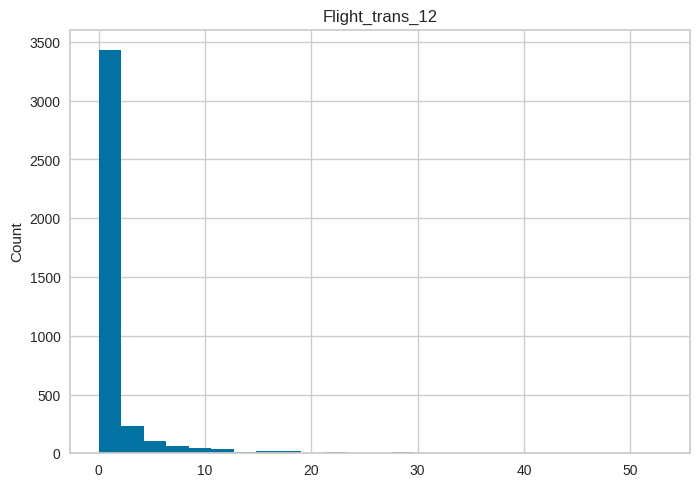

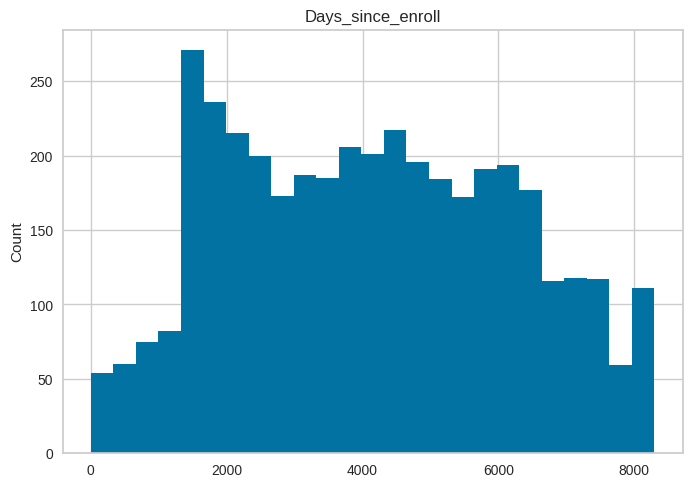

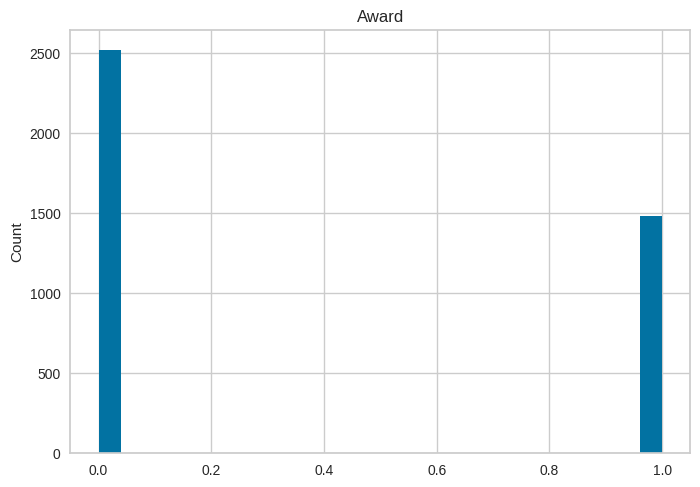

In [240]:
#Distribution of features
for feature in data.columns:
    data=data.copy()
    data[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()


Balance


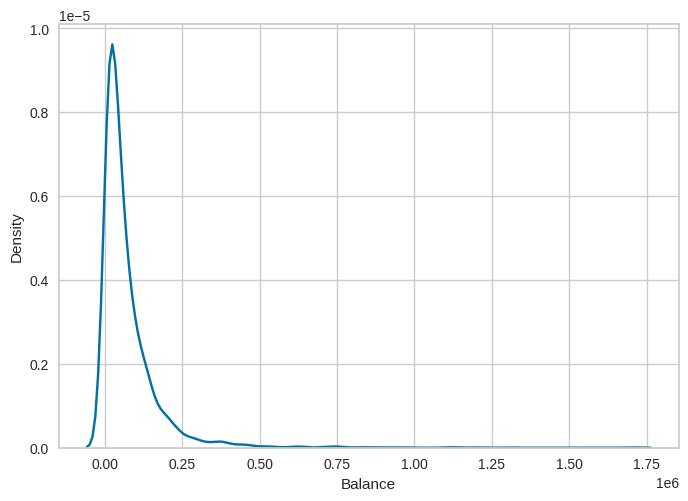

Qual_miles


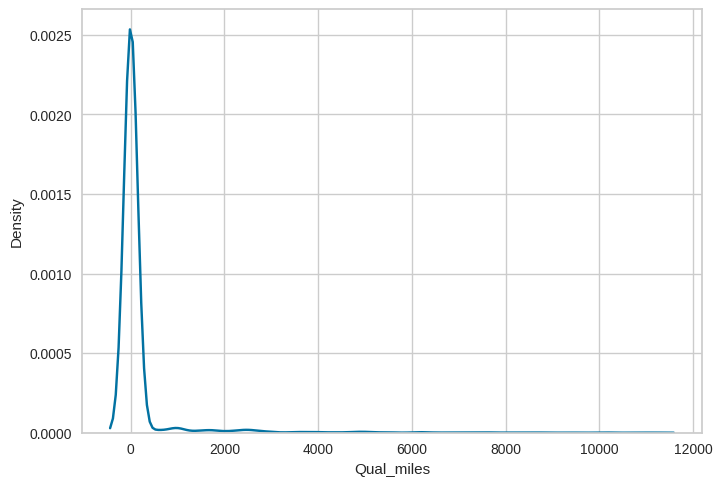

cc1_miles


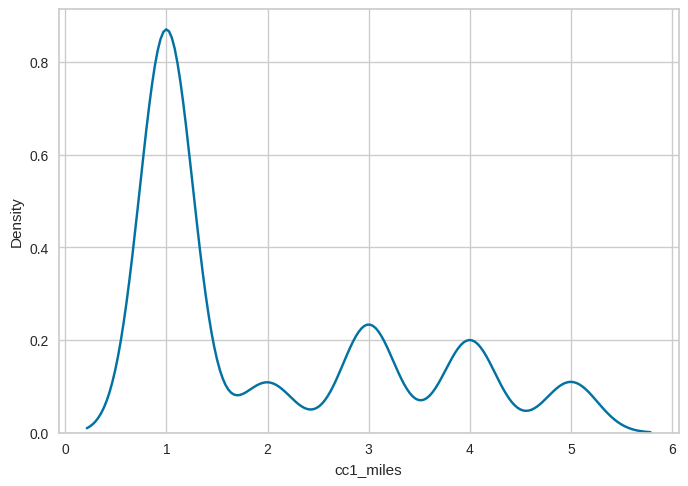

cc2_miles


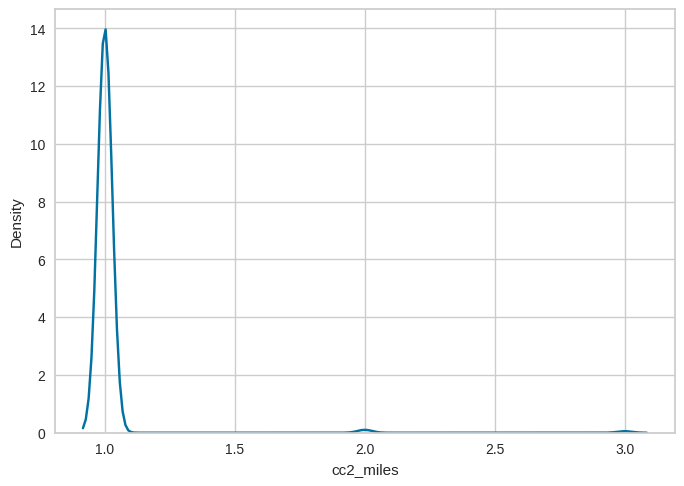

cc3_miles


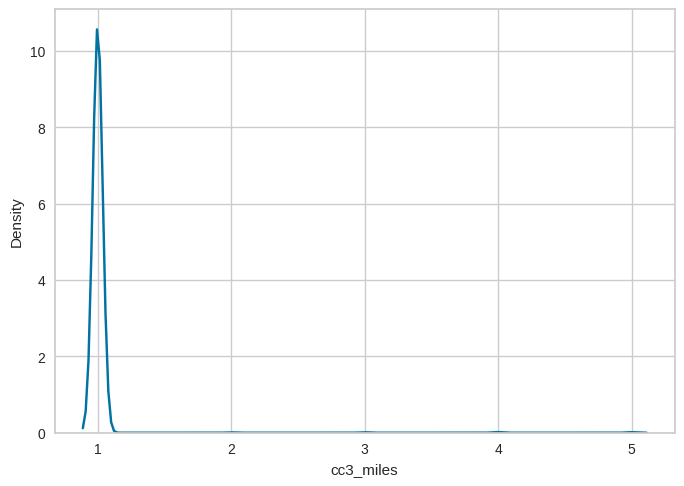

Bonus_miles


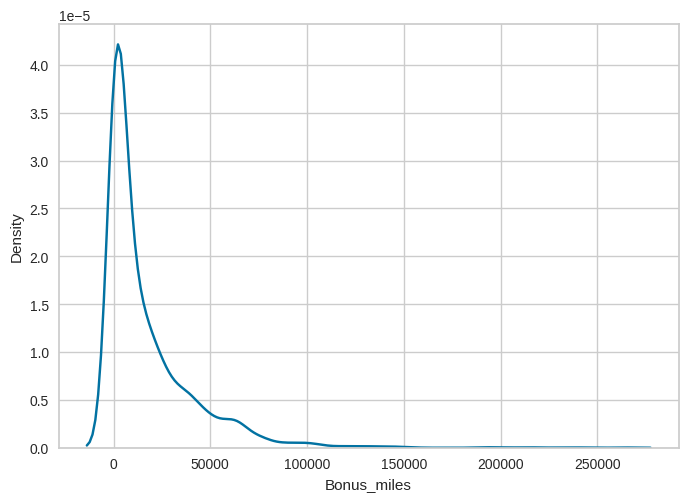

Bonus_trans


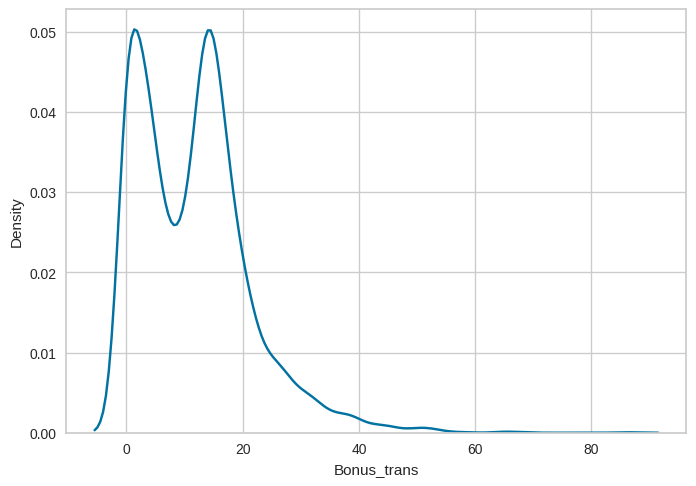

Flight_miles_12mo


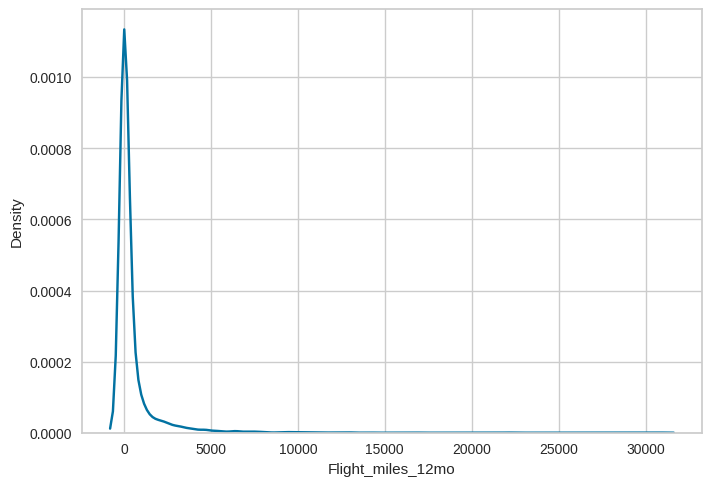

Flight_trans_12


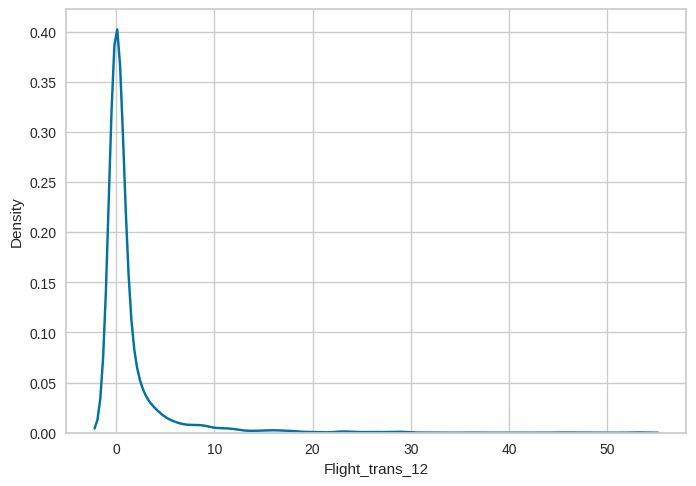

Days_since_enroll


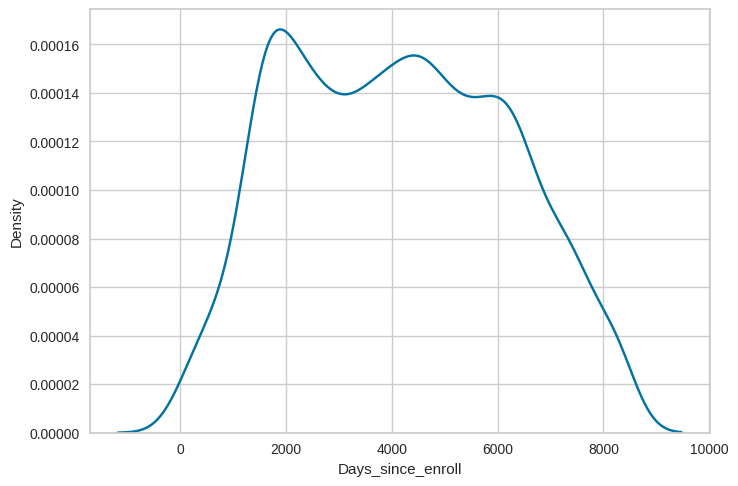

Award


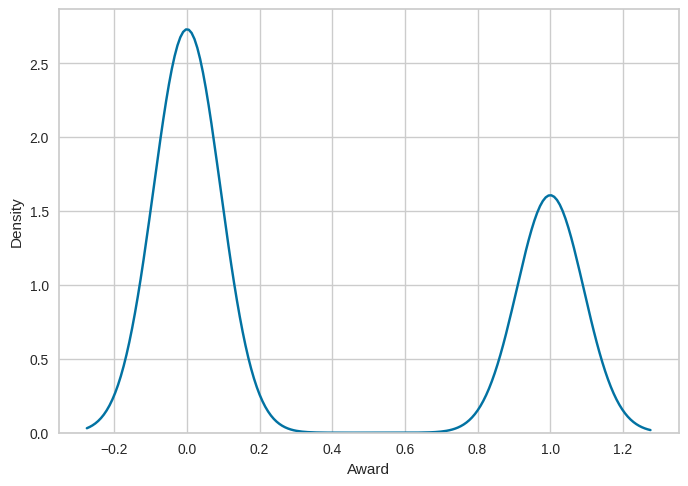

In [241]:
  # Kernel Density for every feature, singled out

for n in data.columns:
    print(n)
    sns.kdeplot(data[n])
    plt.show()

### Outliers Detection

In [242]:
data.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

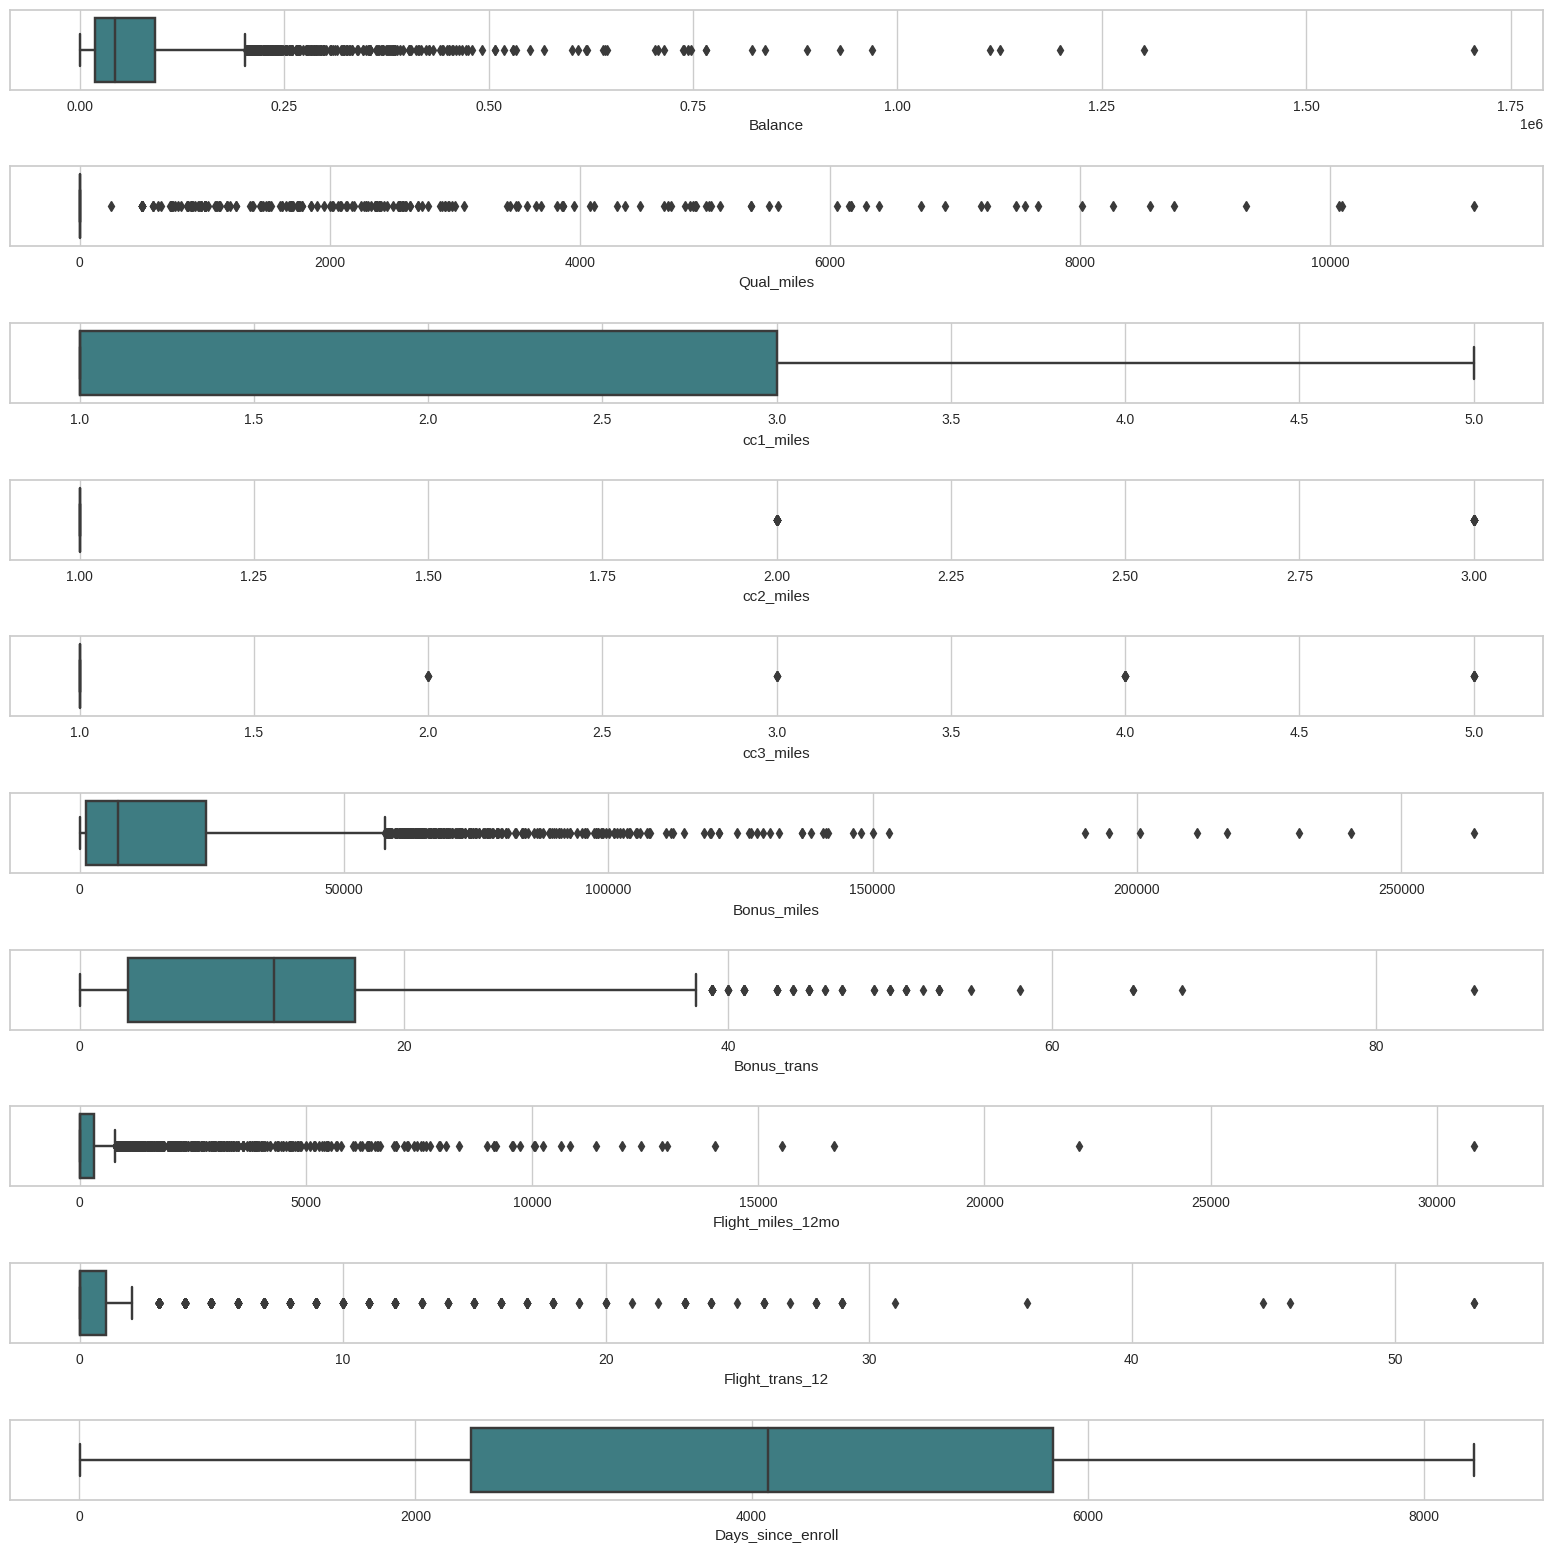

In [243]:
ot=data.copy()
fig, axes=plt.subplots(10,1,figsize=(16,16),sharex=False,sharey=False)
sns.boxplot(x='Balance',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='Qual_miles',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='cc1_miles',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='cc2_miles',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='cc3_miles',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='Bonus_miles',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='Bonus_trans',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='Flight_miles_12mo',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='Flight_trans_12',data=ot,palette='crest',ax=axes[8])
sns.boxplot(x='Days_since_enroll',data=ot,palette='crest',ax=axes[9])
plt.tight_layout(pad=2.0)

<Axes: >

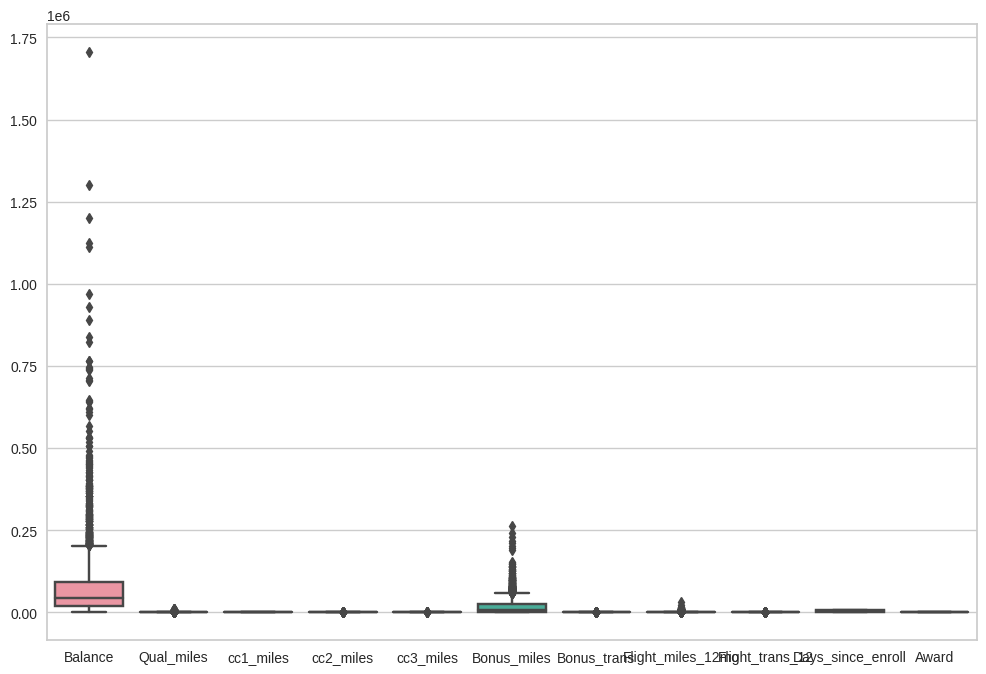

In [244]:
# Box plot for every feature in the same graph

plt.figure(figsize=(12,8))
sns.boxplot(data=data)

<Axes: >

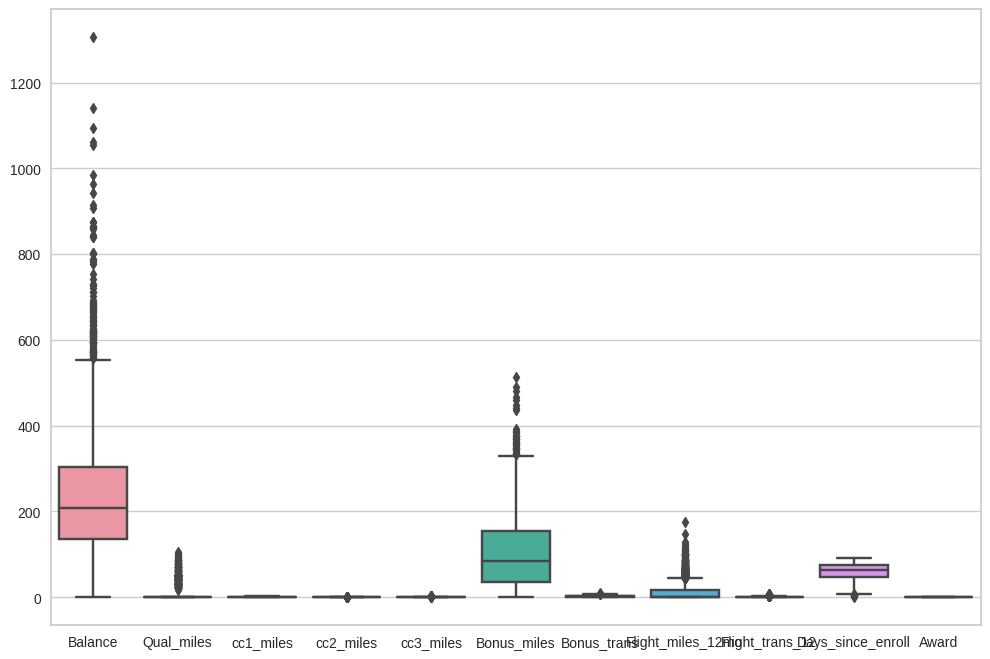

In [245]:
# we use sqrt() to see more clearly despite the outliers

plt.figure(figsize=(12,8))
sns.boxplot(data=np.sqrt(data))

### **Data Visualization**

In [246]:
countNotermdeposit = len(data[data.Award == 0])
counthavetermdeposit = len(data[data.Award == 1])
print("Percentage of Customer doesn't have a Award: {:.2f}%".format((countNotermdeposit / (len(data.Award))*100)))
print("Percentage of Customer does have a Award: {:.2f}%".format((counthavetermdeposit / (len(data.Award))*100)))

Percentage of Customer doesn't have a Award: 62.95%
Percentage of Customer does have a Award: 37.05%


Text(0.5, 1.0, 'Whether the client has a Award or not ')

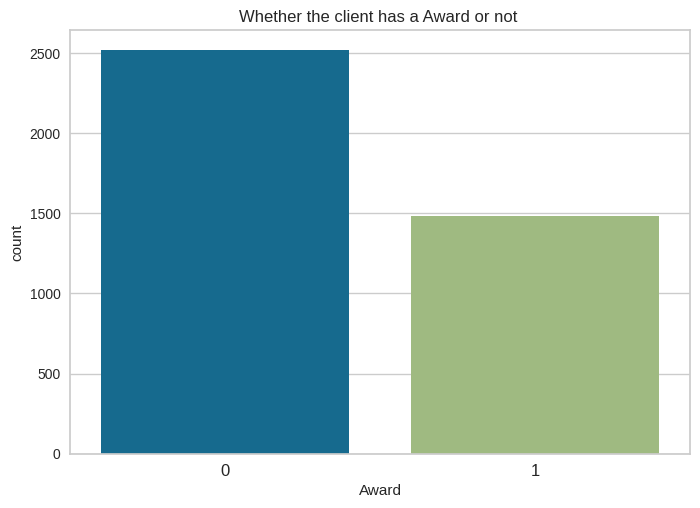

In [247]:
sns.countplot(x='Award', data=data,
              order=data['Award'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Whether the client has a Award or not ')

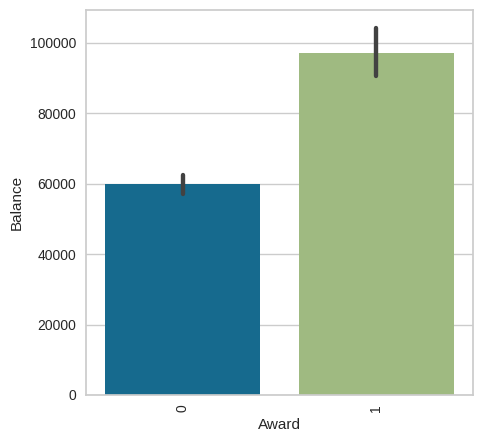

In [248]:
# Balance : Number of miles eligible for award travel

plt.figure(figsize = (5,5))
Balance = data[['Award','Balance']].sort_values('Balance', ascending = False)
ax = sns.barplot(x='Award', y='Balance', data= Balance)
ax.set(xlabel = 'Award', ylabel= 'Balance')
plt.xticks(rotation=90)
plt.show()

In [249]:
# what is correlated with Balance?

corr_matrix = data.corr()
corr_matrix["Balance"].sort_values(ascending=False)

Balance              1.000000
Bonus_miles          0.403334
cc1_miles            0.338160
Bonus_trans          0.324660
Days_since_enroll    0.262821
Flight_trans_12      0.255611
Flight_miles_12mo    0.217466
Award                0.178267
Qual_miles           0.108670
cc3_miles            0.035225
cc2_miles           -0.008840
Name: Balance, dtype: float64

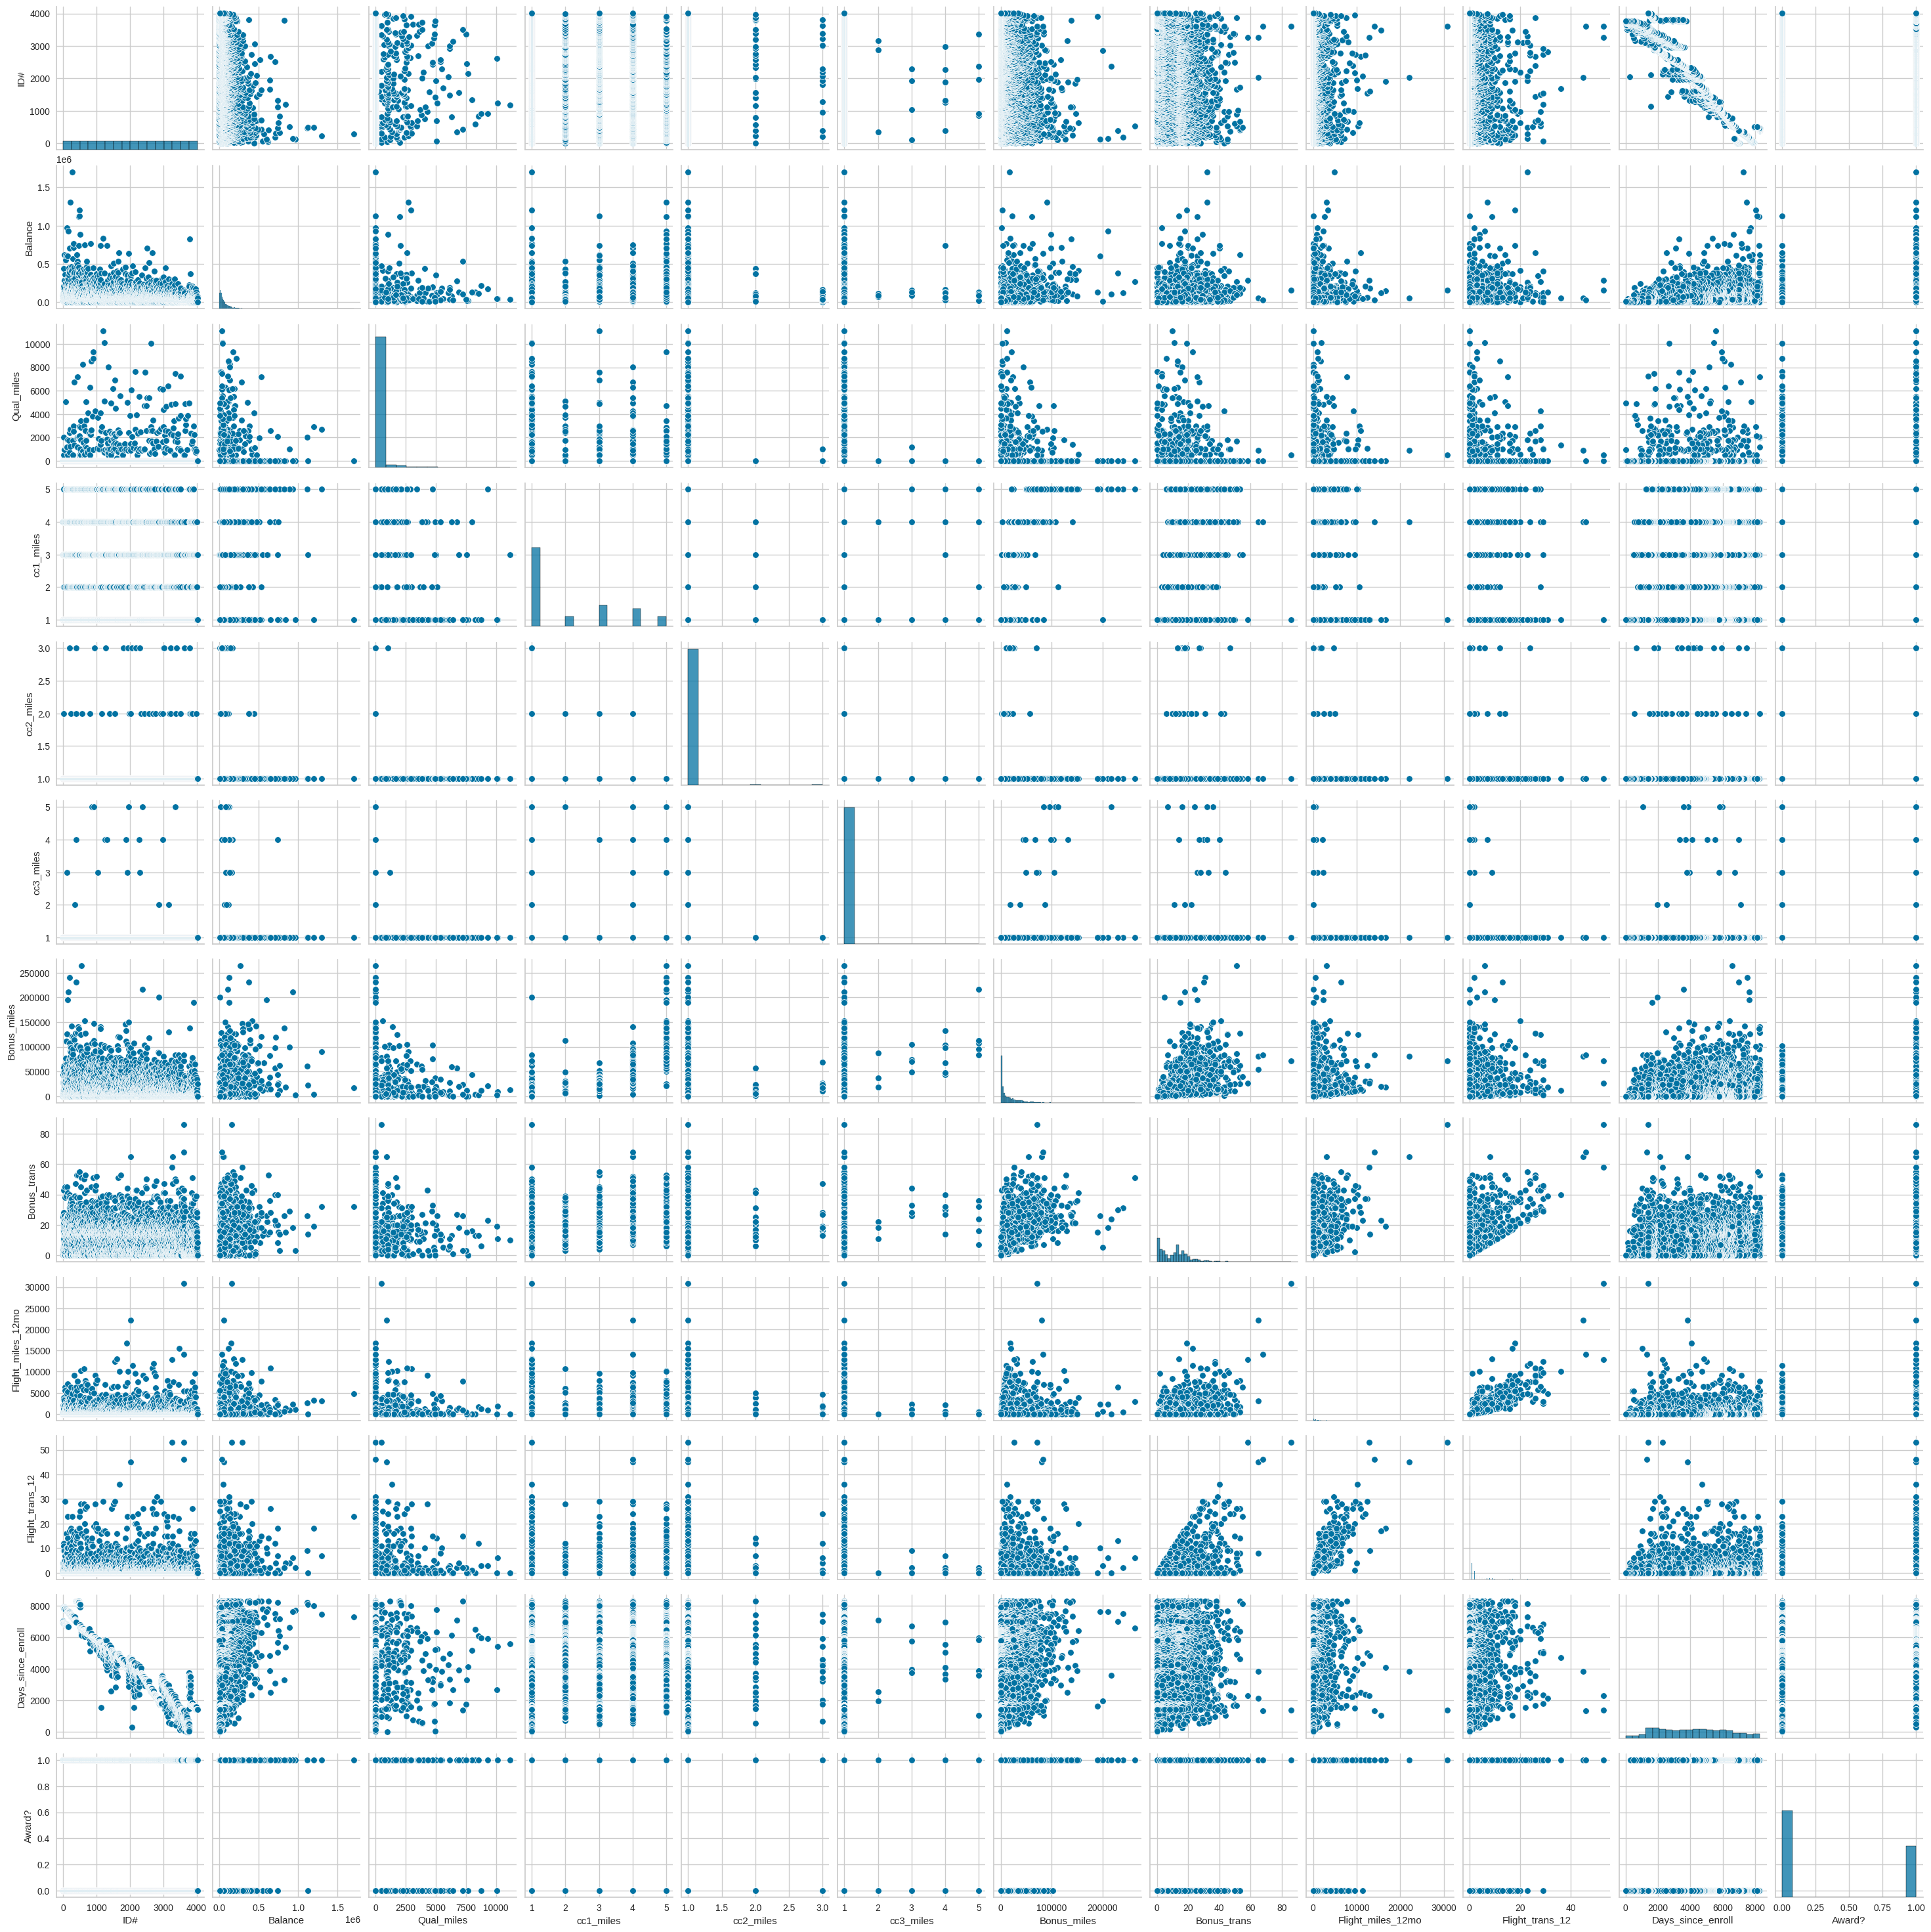

In [250]:
dataset = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
sns.pairplot(dataset)

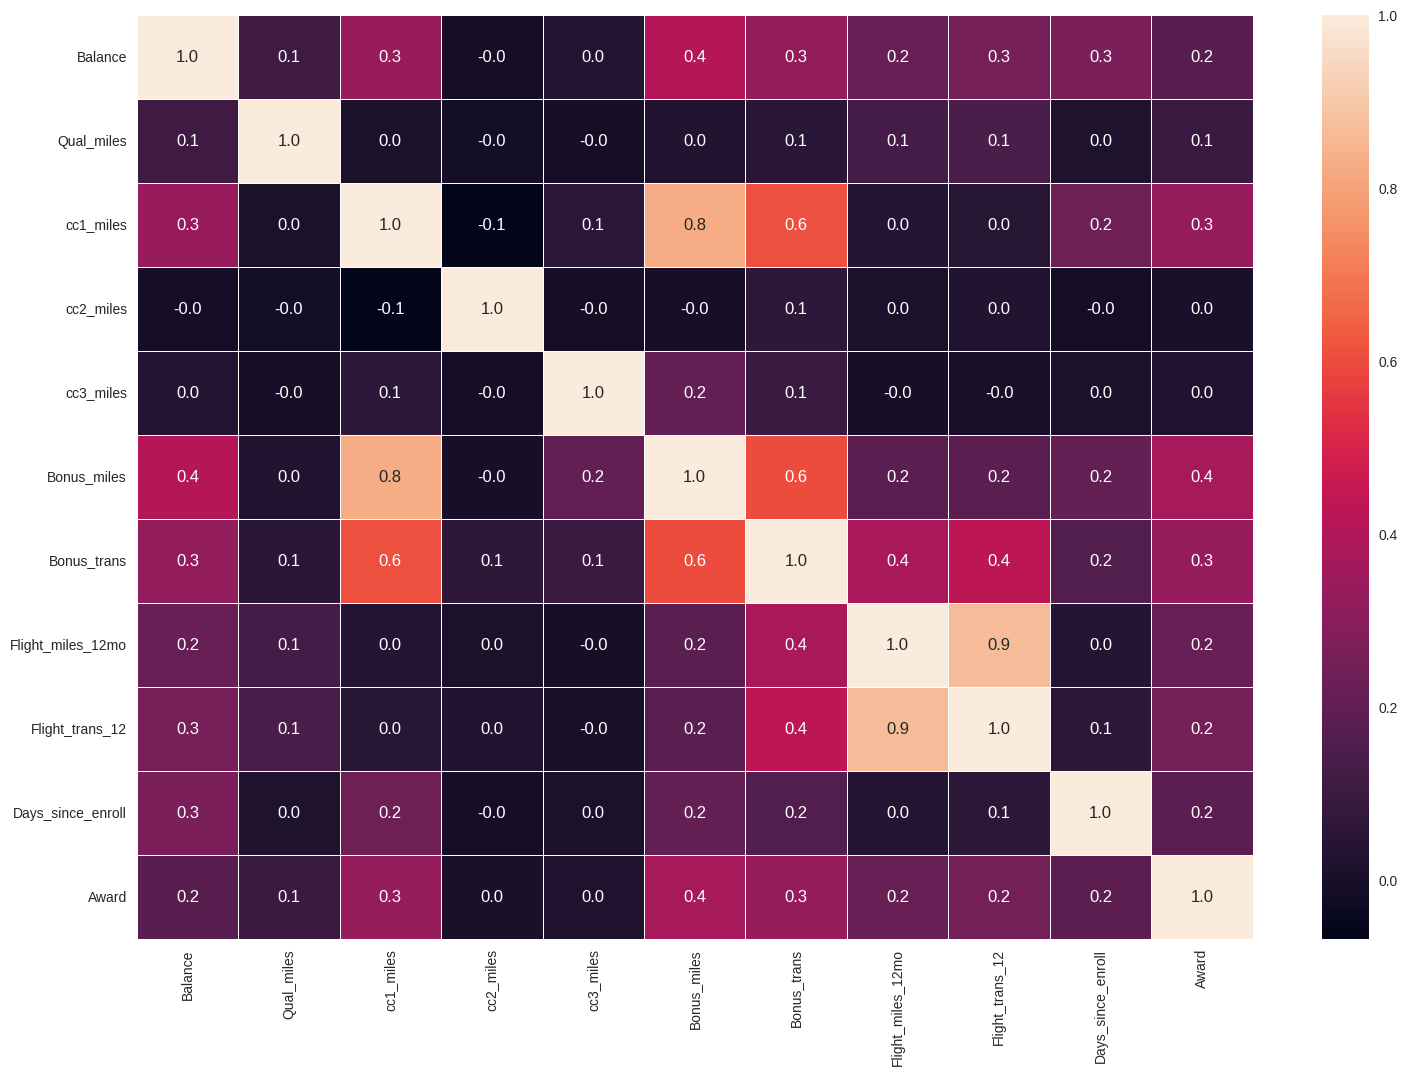

In [251]:
# correlation heatmap

f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(data.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

Unique points in this correlation matrix:

* flight_trans_12 is positively correlated with flight_miles_12mo

* bonus_trans is positively correlated with cc1_miles

* bonus_trans is positively correlated with bonus_miles
* bonus_miles is positively correlated with cc1_miles

In other words, the following are positively correlated

* Number of flight transactions in the past 12 months <-> Number of flight miles in the past 12 months
* Miles passengers earn with the freq. flyer credit card <-> Amount of non-flight transactions
* Number of non-flight bonus transactions <-> Miles passengers earn from non-flight bonus transactions
* Miles passengers earn from non-flight bonus transactions <-> Miles passengers earn with the freq. flyer credit card

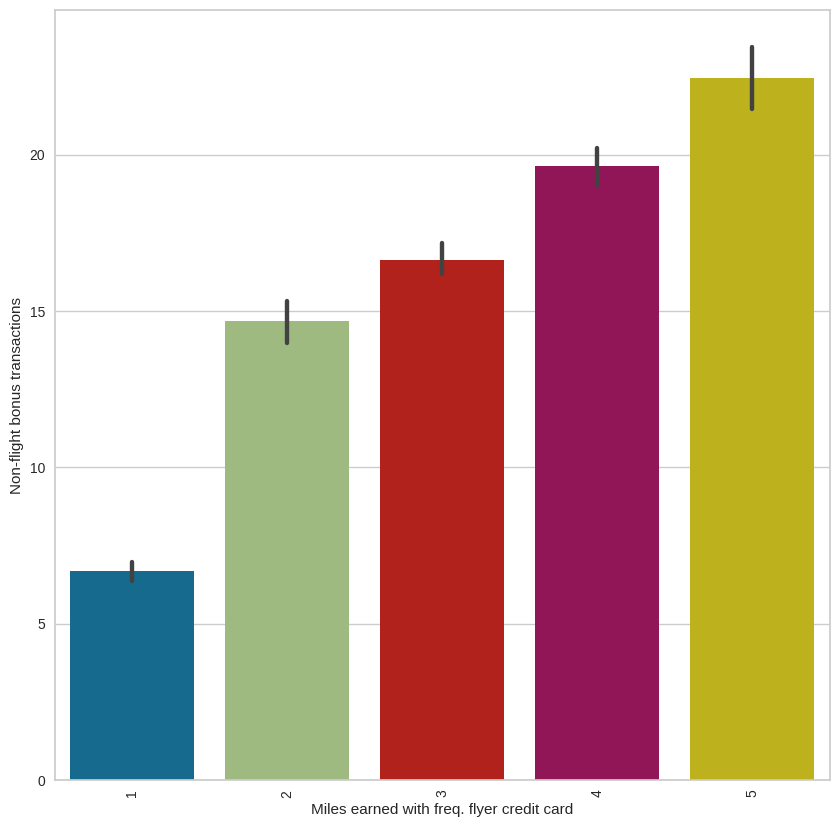

In [252]:
# Plotting frequent flying bonuses vs. non-flight bonus transactions
plt.figure(figsize = (10,10))
sorted_data = data[['cc1_miles','Bonus_trans']].sort_values('Bonus_trans', ascending = False)
ax = sns.barplot(x='cc1_miles', y='Bonus_trans', data= sorted_data)
ax.set(xlabel = 'Miles earned with freq. flyer credit card', ylabel= 'Non-flight bonus transactions')
plt.xticks(rotation=90)
plt.show()

### **Data Preprocessing**

In [253]:
#Standardizing the data
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(data)
std_df.shape

(3997, 11)

In [261]:
# Normalizing continuous data columns

from sklearn.preprocessing import MinMaxScaler

balance_ar=data['Balance'].values.reshape(-1,1)
qual_ar=data['Qual_miles'].values.reshape(-1,1)
bonus_ar=data['Bonus_miles'].values.reshape(-1,1)
bonustrans_ar=data['Bonus_trans'].values.reshape(-1,1)
flightmiles_ar=data['Flight_miles_12mo'].values.reshape(-1,1)
flighttrans_ar=data['Flight_trans_12'].values.reshape(-1,1)
enrol_ar=data['Days_since_enroll'].values.reshape(-1,1)

scaler=MinMaxScaler()

data['Balance']=scaler.fit_transform(balance_ar)
data['Qual_miles']=scaler.fit_transform(qual_ar)
data['Bonus_miles']=scaler.fit_transform(bonus_ar)
data['Bonus_trans']=scaler.fit_transform(bonustrans_ar)
data['Flight_miles_12mo']=scaler.fit_transform(flightmiles_ar)
data['Flight_trans_12']=scaler.fit_transform(flighttrans_ar)
data['Days_since_enroll']=scaler.fit_transform(enrol_ar)

In [263]:
data.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3997.000000,3997.000000,3997.000000,3997.000000,3997.000000,3997.000000,3997.000000,3997.000000,3997.000000,3997.000000,3997.000000
mean,0.043193,0.012934,2.060045,1.014511,1.012259,0.065053,0.134973,0.014936,0.025930,0.496482,0.370528
std,0.059119,0.069416,1.377060,0.147687,0.195289,0.091602,0.111659,0.045446,0.071585,0.248961,0.483007
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010874,0.000000,1.000000,1.000000,1.000000,0.004741,0.034884,0.000000,0.000000,0.280926,0.000000
50%,0.025327,0.000000,1.000000,1.000000,1.000000,0.027286,0.139535,0.000000,0.000000,0.493972,0.000000
75%,0.054202,0.000000,3.000000,1.000000,1.000000,0.090339,0.197674,0.010254,0.018868,0.697974,1.000000
max,1.000000,1.000000,5.000000,3.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## **Hierarchical** **Clustering**

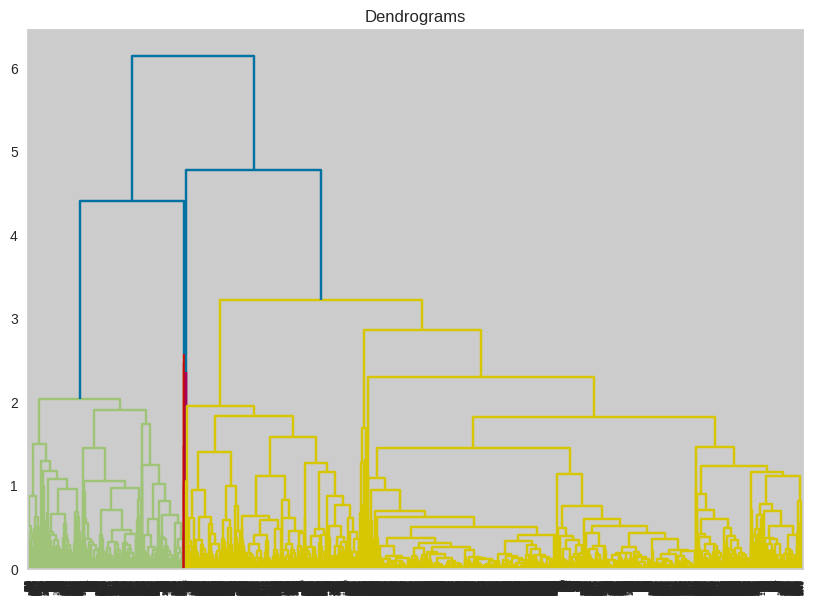

In [268]:
# Drawing the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = sch.dendrogram(sch.linkage(data, method='complete'))

In [270]:
# Creating a loop to calculate the maximum silhouette score and its corresponding number of clusters
# By iterating through various cluster numbers

scores=[]
hc_score=0
hc_cluster=0
i=0
for c in range(3,10):
    hc= AgglomerativeClustering(n_clusters=c, affinity = 'euclidean', linkage = 'complete')
    hc_pred = hc.fit_predict(data)
    score= silhouette_score (data, hc_pred, metric='euclidean')
    scores.append(score)
    i=i+1
    if (score>=max(scores)):
        hc_score=round(score,3)
        hc_cluster=c


print("Maximum silhouette score is {} for optimal number of clusters-{}.".format(hc_score,hc_cluster))
print("Number of iterations:",i)

Maximum silhouette score is 0.561 for optimal number of clusters-3.
Number of iterations: 7


In [271]:
# fitting the model to 3 clusters
hc3=AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')
hc_pred=hc3.fit_predict(data)

In [273]:
hc_df=data.copy()
hc_df['clusters']=hc_pred
hc_df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters
ID,,,,,,,,,,,,
1,0.016508,0.0,1,1,1,0.000660,0.011628,0.000000,0.000000,0.843742,0,1
2,0.011288,0.0,1,1,1,0.000815,0.023256,0.000000,0.000000,0.839884,0,1
3,0.024257,0.0,1,1,1,0.015636,0.046512,0.000000,0.000000,0.847842,0,1
4,0.008667,0.0,1,1,1,0.001896,0.011628,0.000000,0.000000,0.837955,0,1
5,0.057338,0.0,4,1,1,0.164211,0.302326,0.067398,0.075472,0.835905,1,0


In [274]:
# Using groupby function to sort by Clusters
hc_df.groupby(['clusters']).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
clusters,,,,,,,,,,,
0,0.078745,0.015120,4.350920,1.001227,1.042945,0.205367,0.240220,0.020763,0.036439,0.594256,0.642945
1,0.034083,0.012356,1.473568,1.017936,1.000315,0.028801,0.107922,0.013437,0.023214,0.471389,0.300503
2,0.037846,0.026507,1.250000,1.000000,4.250000,0.277884,0.183140,0.018659,0.042453,0.511303,0.500000


# **KMeans Clustering**

# Elbow Method for Determining Cluster Amount


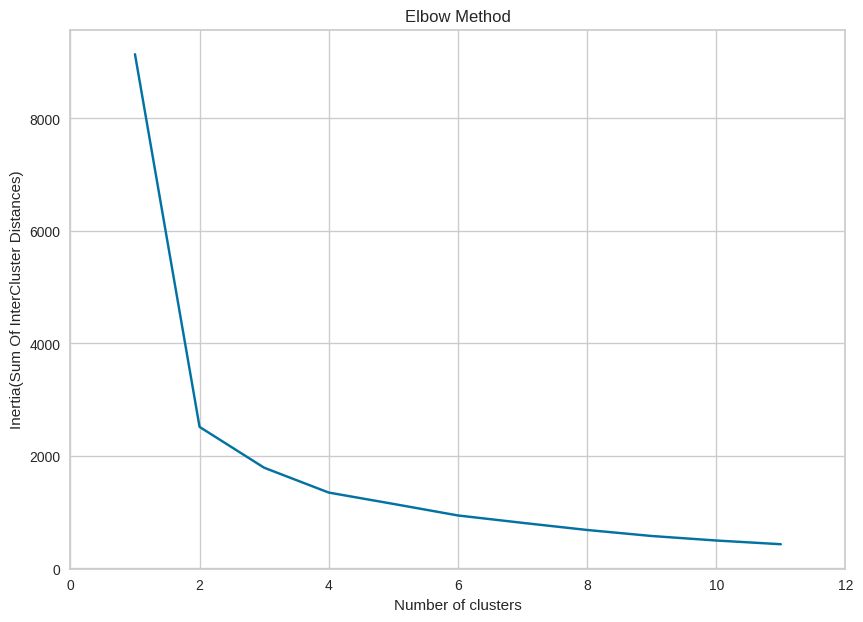

In [275]:
from sklearn.cluster import KMeans
# Finding the optimum number of Clusters using Elbow plot
wcss = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,7))
plt.plot(range(1, 12), wcss)
plt.title('Elbow Method')
plt.xlim(0,12)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia(Sum Of InterCluster Distances)')
plt.show()

From Elbow plot we can see that optimum number of clusters lie between 2 to 6

In [276]:
# Creating a loop to calculate the maximum silhouette score and its corresponding number of clusters
# By iterating through various cluster numbers

scores=[]
km_score=0
km_cluster=0
i=0
for c in range(2,7):
    km= KMeans(n_clusters=c, random_state=0)
    km_pred = km.fit_predict(data)
    score= silhouette_score (data, km_pred, metric='euclidean')
    scores.append(score)
    i=i+1
    if (score>=max(scores)):
        km_score=round(score,3)
        km_cluster=c

print("Maximum silhouette score is {} for optimal number of clusters-{}.".format(km_score,km_cluster))
print("Number of iterations:",i)

Maximum silhouette score is 0.649 for optimal number of clusters-2.
Number of iterations: 5


In [277]:
# Fitting the model to 2 clusters
km2= KMeans(n_clusters=2, random_state=0)
km2_pred = km2.fit_predict(data)

In [278]:
km_df=data.copy()
km_df['clusters']=km2_pred
km_df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters
ID,,,,,,,,,,,,
1,0.016508,0.0,1,1,1,0.000660,0.011628,0.000000,0.000000,0.843742,0,0
2,0.011288,0.0,1,1,1,0.000815,0.023256,0.000000,0.000000,0.839884,0,0
3,0.024257,0.0,1,1,1,0.015636,0.046512,0.000000,0.000000,0.847842,0,0
4,0.008667,0.0,1,1,1,0.001896,0.011628,0.000000,0.000000,0.837955,0,0
5,0.057338,0.0,4,1,1,0.164211,0.302326,0.067398,0.075472,0.835905,1,1


In [279]:
# Using groupby function to sort by Clusters
km_df.groupby(['clusters']).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
clusters,,,,,,,,,,,
0,0.030504,0.012932,1.110463,1.021781,1.005445,0.018164,0.087845,0.014194,0.024761,0.459618,0.261766
1,0.066072,0.012937,3.772090,1.001403,1.024544,0.149590,0.219944,0.016275,0.028037,0.562945,0.566620


## **DBSCAN Clustering**

* Here number of features/dimensions= 12.

* No of minimum points to be considered is between 13 to 24.

In [280]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=20)
nbrs  = neigh.fit(data)
distances, indices = nbrs.kneighbors(data)

In [281]:
distances[0:5]

array([[0.        , 0.00871531, 0.00982329, 0.01139457, 0.01277601,
        0.01331785, 0.01445224, 0.01522595, 0.0169149 , 0.0190791 ,
        0.02126834, 0.02209439, 0.02239988, 0.02272177, 0.02272459,
        0.02337595, 0.02411791, 0.025343  , 0.02845814, 0.02932871],
       [0.        , 0.01212297, 0.01331785, 0.01483947, 0.01590046,
        0.01979155, 0.0200706 , 0.02066999, 0.02338798, 0.02353866,
        0.02424792, 0.02439492, 0.02503437, 0.02696982, 0.02751054,
        0.0288704 , 0.03149609, 0.03166029, 0.03171017, 0.03473729],
       [0.        , 0.01857767, 0.01872551, 0.01892042, 0.02504777,
        0.02735412, 0.03149609, 0.03254401, 0.03579654, 0.03660932,
        0.03693779, 0.03716255, 0.0389617 , 0.04076305, 0.04179049,
        0.04185845, 0.04240907, 0.04293356, 0.04531016, 0.04552297],
       [0.        , 0.00982329, 0.01107883, 0.01188223, 0.01203399,
        0.01212297, 0.01284137, 0.01285681, 0.01463585, 0.01608839,
        0.01686919, 0.02122161, 0.02290527, 0

In [282]:
distances.shape

(3997, 20)

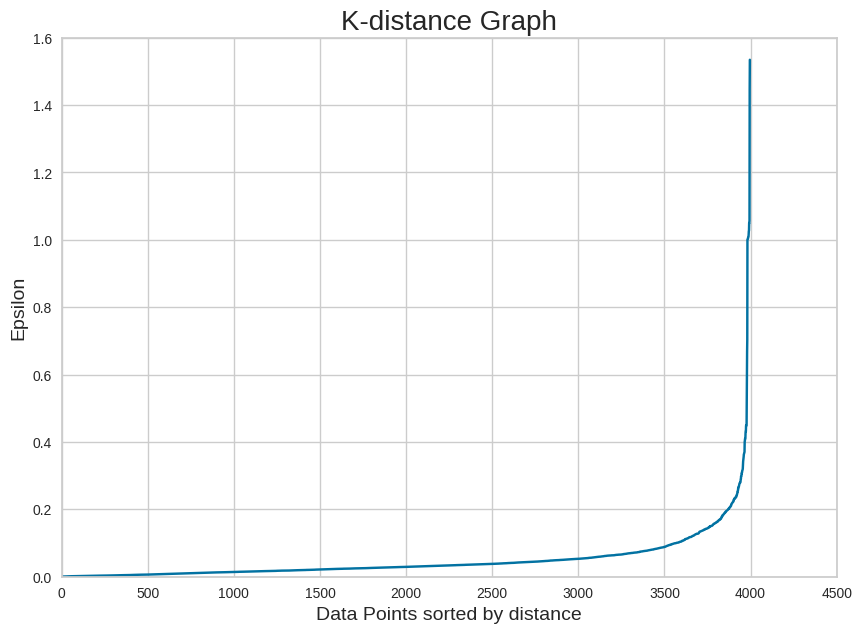

In [283]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.figure(figsize=(10,7))
plt.plot(distances)

plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.xlim(0,4500)
plt.ylim(0,1.6)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

 * The optimal epsilon value is the point of maximum curvature in k-distance graph.
 * Here epsilon can be between 0.3 to 1.00

In [286]:
from sklearn.cluster import DBSCAN
scores=[]

db_score=0
samp=0
eps=0

i=0

for s in range(15,40,5):
    for e in np.arange(0.40,1.25,0.05):
        db=DBSCAN(eps=e,min_samples=s)
        db.fit(data)
        db_pred=db.labels_
        score= silhouette_score (data, db_pred, metric='euclidean')
        scores.append(score)
        i=i+1

        if(score>=max(scores)):

            db_score=round(score,3)
            eps=e
            samp=s

print("Maximum silhouette score is {} for minimum number of samples-{} and epsilon value-{}.".format(db_score,samp,eps))
print("Number of iterations:",i)

Maximum silhouette score is 0.666 for minimum number of samples-15 and epsilon value-0.75.
Number of iterations: 85


In [287]:
db=DBSCAN(eps=0.75,min_samples=15)
db.fit(data)
db_pred=db.labels_

In [289]:
dbs_df=data.copy()
dbs_df['clusters']=db_pred
dbs_df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters
ID,,,,,,,,,,,,
1,0.016508,0.0,1,1,1,0.000660,0.011628,0.000000,0.000000,0.843742,0,0
2,0.011288,0.0,1,1,1,0.000815,0.023256,0.000000,0.000000,0.839884,0,0
3,0.024257,0.0,1,1,1,0.015636,0.046512,0.000000,0.000000,0.847842,0,0
4,0.008667,0.0,1,1,1,0.001896,0.011628,0.000000,0.000000,0.837955,0,0
5,0.057338,0.0,4,1,1,0.164211,0.302326,0.067398,0.075472,0.835905,1,1


In [290]:
# Using groupby function to sort by Clusters
dbs_df.groupby(['clusters']).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
clusters,,,,,,,,,,,
-1,0.061633,0.005230,2.065217,1.913043,2.065217,0.173895,0.277048,0.042410,0.065217,0.515207,0.586957
0,0.022240,0.007920,1.000000,1.000000,1.000000,0.009191,0.065222,0.007820,0.013200,0.429644,0.000000
1,0.054037,0.017380,4.000000,1.000000,1.000000,0.158284,0.239916,0.025178,0.045407,0.574593,1.000000
2,0.054745,0.004237,3.000000,1.000000,1.000000,0.071660,0.185406,0.005770,0.009636,0.503743,0.000000
3,0.051365,0.029077,1.000000,1.000000,1.000000,0.028581,0.104503,0.035081,0.063178,0.521792,1.000000
4,0.041979,0.016748,3.000000,1.000000,1.000000,0.079512,0.200468,0.015102,0.024402,0.540212,1.000000
5,0.039410,0.012964,2.000000,1.000000,1.000000,0.038588,0.163051,0.003638,0.006008,0.509379,0.000000
6,0.105580,0.020447,5.000000,1.000000,1.000000,0.310184,0.267990,0.030915,0.054468,0.664937,1.000000
7,0.079204,0.009535,4.000000,1.000000,1.000000,0.144957,0.208920,0.009136,0.013464,0.566596,0.000000


In [291]:
s={'Clustering techniques':['Hierarchical clustering','K-Means clustering','DBSCAN'],
   'Silhouette score':[hc_score,km_score,db_score],
   'Clusters predicted':[hc_cluster,km_cluster,11]}
clustering=pd.DataFrame(s)
clustering

,Clustering techniques,Silhouette score,Clusters predicted
0,Hierarchical clustering,0.561,3
1,K-Means clustering,0.649,2
2,DBSCAN,0.666,11


It can be seen that silhouette score for DBSCAN was the highest so best cluster segmentation was done by DBSCAN out of all the three algorithms.